In [1]:
# # 20220517 5组 多组同球一起作为实验组 移动到数据集 
# # 3组球的部分图做训练组 3组球的另一部分图做测试组 步进30nm cut3
# #  经过数据增广的图片分门别类 训练集和验证集 4：1
# import os,shutil,glob			#导入模块
# import numpy as np
# path_from1 = os.path.abspath(r"E:\gmd_data\2022年05月17日\5\16cut3_train1_Augument")	#图片原来位置的位置
# path_from2 = os.path.abspath(r"E:\gmd_data\2022年05月17日\5\16cut3_train2_Augument")	#图片原来位置的位置
# path_from3 = os.path.abspath(r"E:\gmd_data\2022年05月17日\5\16cut3_train3_Augument")	#图片原来位置的位置

# # path_from7 = os.path.abspath(r"E:\gmd_data\2022年05月17日\5\16cut3_test")	#图片原来位置的位置
# path_target = os.path.abspath(r"E:\gmd_data\2022_05_17_05_3TrainGroupAugument_16_step30_cut3DataSet\train")	#图片移动到的位置
# path_target2 = os.path.abspath(r"E:\gmd_data\2022_05_17_05_3TrainGroupAugument_16_step30_cut3DataSet\valid")	#图片移动到的位置

# for i in range(7000,12000,48):	#这里创建681个文件夹 步进30nm
# 	# *定义一个变量判断文件是否存在,path指代路径,str(i)指代文件夹的名字*
#     isExists = os.path.exists(path_target+"\\"+str(i))
#     if not isExists:						# 判断如果文件不存在,则创建
#         os.makedirs(path_target+"\\"+str(i))       # 创建文件夹
#     isExists = os.path.exists(path_target2+"\\"+str(i))
#     if not isExists:						# 判断如果文件不存在,则创建
#         os.makedirs(path_target2+"\\"+str(i))       # 创建文件夹
    
#     # 分组复制图片数据集
#     fns = glob.glob(path_from1+'\\'+str(i)+'_'+'*.png') # 每一个高度的图片 读取一次
#     # print(fns)
#     for ind in range(len(fns)): # 列表中的每一张图循环一次
#         dir,fn = os.path.split(fns[ind])  # 分离路径和文件名
#         if ind < len(fns)*0.8:
#             dstfn = path_target+'\\'+str(i)+'\\'+fn[:-4]+'_1.png'  # 生成目标目录下的新文件名
#             isExists = os.path.exists(dstfn)
#             if not isExists:
#                 shutil.copy(fns[ind],dstfn) 
#             # print('ok',dstfn)
#         else:
#             dstfn = path_target2+'\\'+str(i)+'\\'+fn[:-4]+'_1.png'  # 生成目标目录下的新文件名
#             isExists = os.path.exists(dstfn)
#             if not isExists:
#                 shutil.copy(fns[ind],dstfn) 
#             # print('ok',dstfn)

#     fns = glob.glob(path_from2+'\\'+str(i)+'_'+'*.png') # 每一个高度的图片 读取一次
#     # print(fns)
#     for ind in range(len(fns)): # 列表中的每一张图循环一次
#         dir,fn = os.path.split(fns[ind])  # 分离路径和文件名
#         if ind < len(fns)*0.8:
#             dstfn = path_target+'\\'+str(i)+'\\'+fn[:-4]+'_2.png'  # 生成目标目录下的新文件名
#             isExists = os.path.exists(dstfn)
#             if not isExists:
#                 shutil.copy(fns[ind],dstfn) 
#             # print('ok',dstfn)
#         else:
#             dstfn = path_target2+'\\'+str(i)+'\\'+fn[:-4]+'_2.png'  # 生成目标目录下的新文件名
#             isExists = os.path.exists(dstfn)
#             if not isExists:
#                 shutil.copy(fns[ind],dstfn) 
#             # print('ok',dstfn)

#     fns = glob.glob(path_from3+'\\'+str(i)+'_'+'*.png') # 每一个高度的图片 读取一次
#     # print(fns)
#     for ind in range(len(fns)): # 列表中的每一张图循环一次
#         dir,fn = os.path.split(fns[ind])  # 分离路径和文件名
#         if ind < len(fns)*0.8:
#             dstfn = path_target+'\\'+str(i)+'\\'+fn[:-4]+'_3.png'  # 生成目标目录下的新文件名
#             isExists = os.path.exists(dstfn)
#             if not isExists:
#                 shutil.copy(fns[ind],dstfn) 
#             # print('ok',dstfn)
#         else:
#             dstfn = path_target2+'\\'+str(i)+'\\'+fn[:-4]+'_3.png'  # 生成目标目录下的新文件名
#             isExists = os.path.exists(dstfn)
#             if not isExists:
#                 shutil.copy(fns[ind],dstfn) 
#             # print('ok',dstfn)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
%matplotlib inline


Transfer Learning for Computer Vision Tutorial
==============================================

These two major transfer learning scenarios look as follows:

-  **Finetuning the convnet**: Instead of random initialization, we
   initialize the network with a pretrained network, like the one that is
   trained on imagenet 1000 dataset. Rest of the training looks as
   usual.
-  **ConvNet as fixed feature extractor**: Here, we will freeze the weights
   for all of the network except that of the final fully connected
   layer. This last fully connected layer is replaced with a new one
   with random weights and only this layer is trained.


In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

Load Data
---------

We will use torchvision and torch.utils.data packages for loading the
data.

The problem we're going to solve today is to train a model to classify
**ants** and **bees**. We have about 120 training images each for ants and bees.
There are 75 validation images for each class. Usually, this is a very
small dataset to generalize upon, if trained from scratch. Since we
are using transfer learning, we should be able to generalize reasonably
well.

This dataset is a very small subset of imagenet.

.. Note ::
   Download the data from
   `here <https://download.pytorch.org/tutorial/hymenoptera_data.zip>`_
   and extract it to the current directory.



In [3]:
# Data augmentation and normalization for training
# Just normalization for validation
image_transforms  = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees = 45),
        transforms.RandomHorizontalFlip(),
        # transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# dataset = 'E:\gmd_data\microsphere2_dataAugmented'
dataset = 'E:\gmd_data\\2022_05_17_05_3TrainGroupAugument_16_step30_cut3DataSet'
train_directory = os.path.join(dataset, 'train')
valid_directory = os.path.join(dataset, 'valid')

batch_size = 32
# num_classes = 173

data = {
    'train': datasets.ImageFolder(root=train_directory, transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=valid_directory, transform=image_transforms['valid'])

}


train_data_size = len(data['train'])
valid_data_size = len(data['valid'])

train_data = DataLoader(data['train'], batch_size=batch_size, shuffle=True)
valid_data = DataLoader(data['valid'], batch_size=batch_size, shuffle=True)

print(train_data_size, valid_data_size)

304920 76230


迁移学习
---------


这里使用ResNet-50的预训练模型。


In [4]:
resnet34 = models.resnet34(pretrained=True)

for param in resnet34.parameters():
    param.requires_grad = True

fc_inputs = resnet34.fc.in_features
resnet34.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256,105),
    nn.LogSoftmax(dim = 1)


)
resnet34 = resnet34.to('cuda:0')
loss_func = nn.NLLLoss()
# optimizer = optim.AdamW(resnet50.parameters(),lr=1e-4)

Training the model
------------------

Now, let's write a general function to train a model. Here, we will
illustrate:

-  Scheduling the learning rate
-  Saving the best model

In the following, parameter ``scheduler`` is an LR scheduler object from
``torch.optim.lr_scheduler``.



Epoch: 1/3000
Epoch: 001, Training: Loss: 1.7534, Accuracy: 50.4054%, 
		Validation: Loss: 2.7210, Accuracy: 51.2646%, Time: 14957.6311s
Best Accuracy for validation : 0.5126 at epoch 001
Best Accuracy for train : 0.5041 at epoch 001


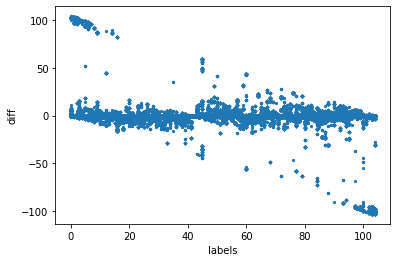

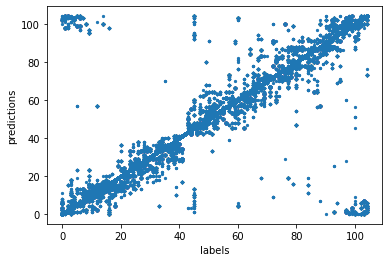

Epoch: 2/3000
Epoch: 002, Training: Loss: 0.1541, Accuracy: 95.6412%, 
		Validation: Loss: 3.0129, Accuracy: 52.5148%, Time: 14019.4695s
Best Accuracy for validation : 0.5251 at epoch 002
Best Accuracy for train : 0.9564 at epoch 002


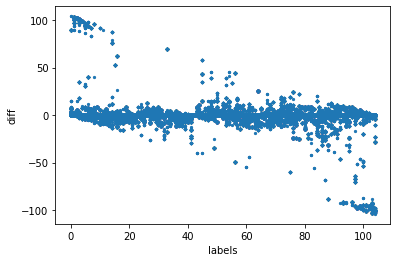

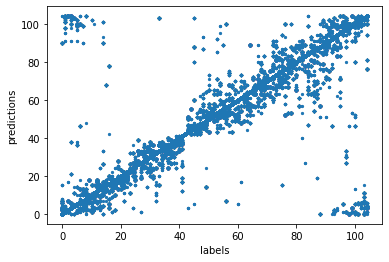

Epoch: 3/3000
Epoch: 003, Training: Loss: 0.0835, Accuracy: 97.5843%, 
		Validation: Loss: 3.4682, Accuracy: 52.2498%, Time: 13821.8948s
Best Accuracy for validation : 0.5251 at epoch 002
Best Accuracy for train : 0.9758 at epoch 003


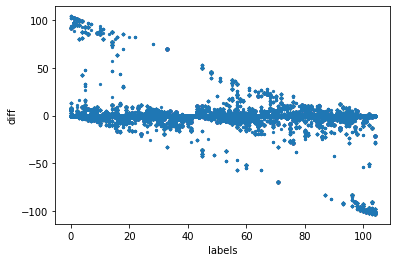

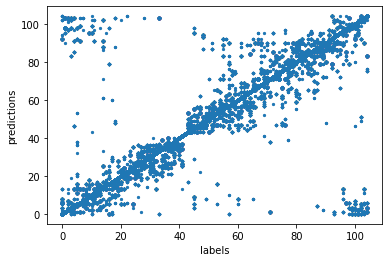

Epoch: 4/3000


KeyboardInterrupt: 

In [7]:
model = resnet34
loss_function = loss_func
epochs = 3000
# LR_value = 1e-4
LR_value = 1e-4
# trained_model, history = train_and_valid(resnet50, loss_func, num_epochs)
# torch.save(history, 'models/'+dataset+'_history.pt')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
history = []
best_acc = 0.0
best_acc_train = 0.0
best_epoch = 0
best_epoch_train = 0

for epoch in range(epochs):
    epoch_start = time.time()
    print("Epoch: {}/{}".format(epoch+1, epochs))

    model.train()

    train_loss = 0.0
    train_acc = 0.0
    valid_loss = 0.0
    valid_acc = 0.0
#         学习率递减
    if epoch <= 40:
        LR = LR_value;
    elif epoch <= 80:
        LR = LR_value*0.5;
    elif epoch <= 120:
        LR = LR_value*0.5*0.5;
    elif epoch <= 160:
        LR = LR_value*0.5*0.5*0.5;
    else:
        LR = LR_value*0.5*0.5*0.5*0.5;
    optimizer = optim.AdamW(resnet34.parameters(),lr=LR)

    for i, (inputs, labels) in enumerate(train_data):
        inputs = inputs.to(device)
        labels = labels.to(device)

        #因为这里梯度是累加的，所以每次记得清零
        optimizer.zero_grad()

        outputs = model(inputs)

        loss = loss_function(outputs, labels)

        loss.backward()

        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

        ret, predictions = torch.max(outputs.data, 1)
        correct_counts = predictions.eq(labels.data.view_as(predictions))

        acc = torch.mean(correct_counts.type(torch.FloatTensor))

        train_acc += acc.item() * inputs.size(0)

    with torch.no_grad():
        model.eval()
        predictions_all = torch.tensor([]).to(device)
        labels_all = torch.tensor([]).to(device)

        for j, (inputs, labels) in enumerate(valid_data):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)

            loss = loss_function(outputs, labels)

            valid_loss += loss.item() * inputs.size(0)

            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            predictions_all = torch.cat((predictions_all,predictions),dim=0)
            labels_all = torch.cat((labels_all,labels),dim=0)

            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            valid_acc += acc.item() * inputs.size(0)

    avg_train_loss = train_loss/train_data_size
    avg_train_acc = train_acc/train_data_size

    avg_valid_loss = valid_loss/valid_data_size
    avg_valid_acc = valid_acc/valid_data_size

    history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

    if best_acc < avg_valid_acc:
        best_acc = avg_valid_acc
        best_epoch = epoch + 1
        
    if best_acc_train < avg_train_acc:
        best_acc_train = avg_train_acc
        best_epoch_train = epoch + 1

    epoch_end = time.time()

    print("Epoch: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation: Loss: {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(
        epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start
    ))
    print("Best Accuracy for validation : {:.4f} at epoch {:03d}".format(best_acc, best_epoch))
    print("Best Accuracy for train : {:.4f} at epoch {:03d}".format(best_acc_train, best_epoch_train))

    torch.save(model, dataset+'/models/'+'model_'+str(epoch+1)+'.pt')
    
    diff = predictions_all - labels_all
    conc_all = torch.cat((labels_all,predictions_all,diff),dim=0)

    plt.scatter(labels_all.cpu(),diff.cpu(),s=5)
    # plt.legend(['Tr Accuracy', 'Val Accuracy'])
    plt.xlabel('labels')
    plt.ylabel('diff')
    # plt.ylim(0, 1)
    # plt.savefig("C:\\Users\\nanolab115\Desktop\\"+"diff1.png")
    plt.show()

    plt.scatter(labels_all.cpu(),predictions_all.cpu(),s=5)
    # plt.legend(['Tr Accuracy', 'Val Accuracy'])
    plt.xlabel('labels')
    plt.ylabel('predictions')
    # plt.ylim(0, 1)
    # plt.savefig("C:\\Users\\nanolab115\Desktop\\"+"diff1.png")
    plt.show()


In [1]:
history = np.array(history)
plt.plot(history[:, 0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.savefig(dataset+'_loss_curve.png')
plt.show()

plt.plot(history[:, 2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.savefig(dataset+'_accuracy_curve.png')
plt.show()

NameError: name 'np' is not defined

导入模型 将验证集和真值对比图画出来
-------

In [4]:
# 导入模型 将验证集和真值对比图画出来

model38 = torch.load( dataset+'/models/'+'model_3.pt')
for param in model38.parameters():
    param.requires_grad = False
model38 = model38.to('cuda:0')
loss_function = nn.NLLLoss()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
history = []
best_acc = 0.0
best_epoch = 0

valid_loss = 0.0
valid_acc = 0.0

predictions_all = torch.tensor([]).to(device)
labels_all = torch.tensor([]).to(device)

for j, (inputs, labels) in enumerate(valid_data):
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model38(inputs)

    loss = loss_function(outputs, labels)
    # print("valid_data_j: {}".format(j))
    # print("Outputs : ")
    # print(outputs)
    # print("labels ：")
    # print(labels)
    # print("loss ：")
    # print(loss)

    valid_loss += loss.item() * inputs.size(0)

    ret, predictions = torch.max(outputs.data, 1)

    predictions_all = torch.cat((predictions_all,predictions),dim=0)
    labels_all = torch.cat((labels_all,labels),dim=0)

    correct_counts = predictions.eq(labels.data.view_as(predictions))

    acc = torch.mean(correct_counts.type(torch.FloatTensor))

    valid_acc += acc.item() * inputs.size(0)

avg_valid_loss = valid_loss/valid_data_size
avg_valid_acc = valid_acc/valid_data_size

验证集 结果：准确率、误差图像
-

Validation: Loss: 3.4681, Accuracy: 52.2485%
Validation: MAE: 1.6585, Percentage of points retained:87.2675% 


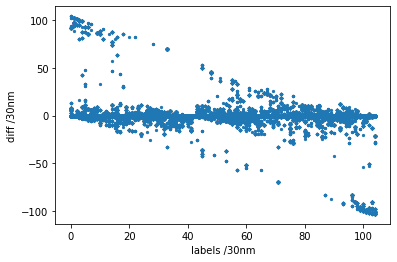

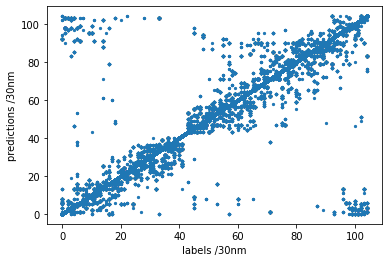

In [5]:
history.append([avg_valid_loss, avg_valid_acc])

print("Validation: Loss: {:.4f}, Accuracy: {:.4f}%".format(
    avg_valid_loss, avg_valid_acc*100
))

diff = predictions_all - labels_all
# conc_all = torch.cat((labels_all,predictions_all,diff),dim=0)
device = torch.device("cpu")
diff_small = diff[(diff>-10)&(diff<10)].to(device)
diff_rate = len(diff_small)/len(diff)
DIFF_MAE = np.linalg.norm(diff_small, ord = 1) / len(diff_small)
print("Validation: MAE: {:.4f}, Percentage of points retained:{:.4f}% ".format(
    DIFF_MAE, diff_rate*100
    ))

fig, ax = plt.subplots()
plt.scatter(labels_all[0:50000].cpu(),diff[0:50000].cpu(),s=5)
# plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('labels /30nm')
plt.ylabel('diff /30nm')
# plt.ylim(-30,30)
plt.yscale
# plt.savefig("C:\\Users\\nanolab115\Desktop\\"+"diff1.png")
plt.show()
fig.savefig('Diff_2022_05_17_05_3TrainGroupAugument_16_step30_cut3DataSet.svg',dpi = 300, format = 'svg')


fig, ax = plt.subplots()
plt.scatter(labels_all[0:50000].cpu(),predictions_all[0:50000].cpu(),s=5)
# plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('labels /30nm')
plt.ylabel('predictions /30nm')
# plt.ylim(0, 1)
# plt.savefig("C:\\Users\\nanolab115\Desktop\\"+"diff1.png")
plt.show()
fig.savefig('Predictions_2022_05_17_05_3TrainGroupAugument_16_step30_cut3DataSet.svg',dpi = 300, format = 'svg')

测试组：用未训练的 0104-2组 进行测试
-

Validation: valid_data_size: 1060.0000
Validation: Loss: 931.1962, Accuracy: 0.0000%


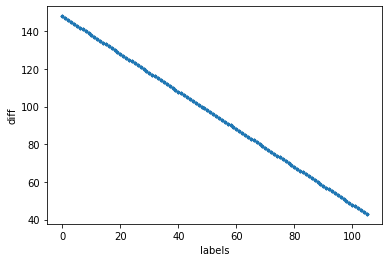

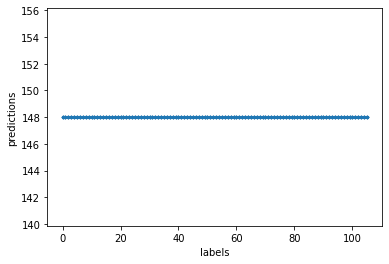

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

# Data augmentation and normalization for training
# Just normalization for validation
image_transforms  = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees = 45),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# dataset = 'E:\gmd_data\microsphere2_dataAugmented'
dataset = 'E:\gmd_data\GMD_0104_2_DATA' # 测试集 0104-2
# dataset = 'E:\gmd_data\GMD_0104_3_DATA' # 测试集 0104-3
# dataset = 'E:\gmd_data\\fangdai_MixTest' # 防呆测试 0104-2-3混合
# dataset = 'E:\gmd_data\GMD_0104_2_DATA_TEST' # 测试集 0104-2 50-8650 照明测试

# train_directory = os.path.join(dataset, 'train')
valid_directory = os.path.join(dataset, 'valid')

batch_size = 32
# num_classes = 173
# class Datset():
#     def __getitem(self,index):
        
#         return image_torch
#     def __len__(self):
#         pass

# data = {
#     # 'train': datasets.ImageFolder(root=train_directory, transform=image_transforms['train']),
#     'valid':Datset(root=valid_directory, transform=image_transforms['valid'])

# }
data = {
    # 'train': datasets.ImageFolder(root=train_directory, transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=valid_directory, transform=image_transforms['valid'])

}



# train_data_size = len(data['train'])
valid_data_size = len(data['valid'])

# train_data = DataLoader(data['train'], batch_size=batch_size, shuffle=True)
valid_data = DataLoader(data['valid'], batch_size=batch_size, shuffle=True)

print("Validation: valid_data_size: {:.4f}".format(
    valid_data_size
))


# 导入模型 将验证集和真值对比图画出来
dataset = 'E:\gmd_data\microsphere2_dataAugmented'
model38 = torch.load( dataset+'/models/'+'model_38.pt')
for param in model38.parameters():
    param.requires_grad = False
model38 = model38.to('cuda:0')
loss_function = nn.NLLLoss()



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
history = []
best_acc = 0.0
best_epoch = 0


valid_loss = 0.0
valid_acc = 0.0

predictions_all = torch.tensor([]).to(device)
labels_all = torch.tensor([]).to(device)

with torch.no_grad():
    model38.eval()
    for j, (inputs, labels) in enumerate(valid_data):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model38(inputs)

        loss = loss_function(outputs, labels)
        # print("valid_data_j: {}".format(j))
        # print("Outputs : ")
        # print(outputs)
        # print("labels ：")
        # print(labels)
        # print("loss ：")
        # print(loss)

        valid_loss += loss.item() * inputs.size(0)

        ret, predictions = torch.max(outputs.data, 1)

        predictions_all = torch.cat((predictions_all,predictions),dim=0)
        labels_all = torch.cat((labels_all,labels),dim=0)

        correct_counts = predictions.eq(labels.data.view_as(predictions))

        acc = torch.mean(correct_counts.type(torch.FloatTensor))

        valid_acc += acc.item() * inputs.size(0)

avg_valid_loss = valid_loss/valid_data_size
avg_valid_acc = valid_acc/valid_data_size

avg_valid_loss = valid_loss/valid_data_size
avg_valid_acc = valid_acc/valid_data_size

# plot
history.append([avg_valid_loss, avg_valid_acc])

print("Validation: Loss: {:.4f}, Accuracy: {:.4f}%".format(
    avg_valid_loss, avg_valid_acc*100
))
# print("Validation: MSE: {:.4f}".format( ))

diff = predictions_all - labels_all
conc_all = torch.cat((labels_all,predictions_all,diff),dim=0)

plt.scatter(labels_all[0:50000].cpu(),diff[0:50000].cpu(),s=5)
# plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('labels')
plt.ylabel('diff')
# plt.ylim(0, 1)
# plt.savefig("C:\\Users\\nanolab115\Desktop\\"+"diff1.png")
plt.show()

plt.scatter(labels_all.cpu(),predictions_all.cpu(),s=5)
# plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('labels')
plt.ylabel('predictions')
# plt.ylim(0, 1)
# plt.savefig("C:\\Users\\nanolab115\Desktop\\"+"diff1.png")
plt.show()

Test Command
------


In [ ]:
value,num = torch.max(outputs, 1)
print("num:",num,"value:",value)


num: tensor([168], device='cuda:0') value: tensor([-0.0022], device='cuda:0')


In [ ]:
print("outputs:",outputs)

outputs1 = torch.cat((outputs,outputs),dim=0)
print("outputs1:",outputs1)

value,num = torch.max(outputs1, 1)
print("num:",num,"value:",value)


outputs: tensor([[-4.9504e+01, -5.5556e+01, -6.4833e+01, -7.4970e+01, -8.5962e+01,
         -8.8016e+01, -9.6433e+01, -1.0100e+02, -9.9389e+01, -1.0482e+02,
         -1.0389e+02, -4.7640e+01, -8.3659e+01, -7.6490e+01, -6.6539e+01,
         -6.6105e+01, -6.2998e+01, -6.6530e+01, -6.1330e+01, -5.6204e+01,
         -3.3516e+01, -3.4015e+01, -2.9832e+01, -5.1219e+01, -5.1118e+01,
         -7.7792e+01, -8.0729e+01, -8.7210e+01, -7.7605e+01, -1.0523e+02,
         -9.8735e+01, -1.0985e+02, -1.2003e+02, -4.8393e+01, -1.2292e+02,
         -1.2874e+02, -1.2656e+02, -1.1117e+02, -1.1285e+02, -1.0200e+02,
         -9.0714e+01, -8.9426e+01, -7.5569e+01, -6.9013e+01, -4.4566e+01,
         -5.4173e+01, -5.0531e+01, -4.3763e+01, -4.0917e+01, -4.7471e+01,
         -4.0777e+01, -4.0884e+01, -4.5677e+01, -6.0832e+01, -6.6128e+01,
         -3.3768e+01, -6.3326e+01, -8.3918e+01, -8.3963e+01, -7.3704e+01,
         -1.0347e+02, -9.3055e+01, -1.0524e+02, -1.1130e+02, -1.0509e+02,
         -1.0142e+02, -6.6610

In [ ]:
num2 = torch.tensor([]).to(device)
num1 = torch.cat((num2,num),dim=0)

In [ ]:
print('C:\\Users\\nanolab115\Desktop\\'+'diff1.png')

C:\Users\nanolab115\Desktop\diff1.png
